In [601]:
# Importar bibliotecas necessárias
import pandas as pd
from manim import *
from IPython.display import display, Markdown

In [602]:
# Ler o arquivo Markdown no formato de tabela
file_path = "/home/patropi/my-moviemaker/scenes/arvore_conceitual.md" 
data = pd.read_csv(file_path, sep="|", skiprows=1, usecols=[1, 2, 3, 4])

# Renomear colunas e limpar espaços extras
data.columns = ["id", "text", "shape", "parent"]
data = data.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

console.print(data)

id       text      shape parent
0   1       Raiz     circle       
1   2    Galho 1  rectangle      1
2   3    Galho 2  rectangle      1
3   6    Galho 3  rectangle      1
4   4  Folha 2.1    ellipse      2
5   5  Folha 2.2    ellipse      2
6   7  Folha 3.1    ellipse      6
7   8    Galho 4  rectangle      1

In [603]:
# Função para converter colunas para tipos apropriados
def convert_column_types(df):
    for column in df.columns:
        try:
            # Tentar converter para numérico
            df[column] = pd.to_numeric(df[column])
            
            # Verificar se a coluna pode ser convertida para inteiro
            if pd.api.types.is_float_dtype(df[column]):
                if df[column].dropna().apply(float.is_integer).all():
                    df[column] = df[column].astype('Int64')
        except ValueError:
            # Se a conversão falhar, manter os valores originais
            df[column] = df[column].astype(str)
    
    return df

In [604]:
# Aplicar a função ao DataFrame
data = convert_column_types(data)

# Exibir título e tabela
display(Markdown("### Tabela da Árvore Conceitual"))
display(data)

### Tabela da Árvore Conceitual

,id,text,shape,parent
0,1,Raiz,circle,<NA>
1,2,Galho 1,rectangle,1
2,3,Galho 2,rectangle,1
3,6,Galho 3,rectangle,1
4,4,Folha 2.1,ellipse,2
5,5,Folha 2.2,ellipse,2
6,7,Folha 3.1,ellipse,6
7,8,Galho 4,rectangle,1


Manim Community v0.18.1

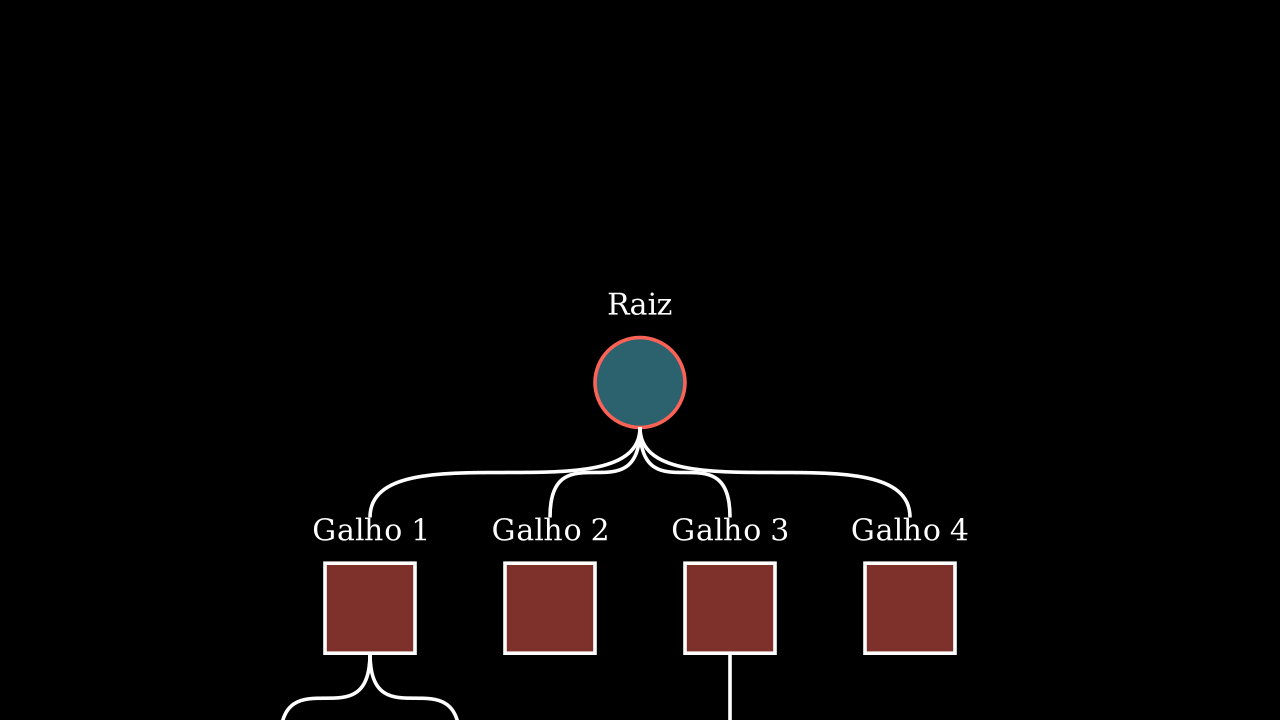

In [612]:
# %%manim -qm -v WARNING ArvoreConceitual

# Construir a Cena da árvore conceitual
class ArvoreConceitual(Scene):
    def construct(self):
        data["node"] = None

        for _, node in data.iterrows():
            if node["shape"] == "circle":
                node_shape = Circle().scale(0.5).set_fill(BLUE, opacity=0.5)
            elif node["shape"] == "rectangle":
                node_shape = Square().scale(0.5).set_fill(RED, opacity=0.5)
            elif node["shape"] == "ellipse":
                node_shape = Ellipse(width=2.0, height=1.0).set_fill(GREEN, opacity=0.5)
            else:
                node_shape = Dot()
            
            node_text = Text(node["text"]).scale(0.5)
            group = VGroup(node_shape, node_text).arrange(UP)

            if pd.isna(node["parent"]):
                group.move_to(ORIGIN)
                data.at[node.name, "node"] = group
            else:
                parent_node = data.loc[data["id"] == node["parent"]].iloc[0]
                if parent_node is not None:
                    n_sibilings = len(data.loc[data["parent"] == parent_node["id"]])
                    offset = (RIGHT * (node.name - len(data.loc[data["parent"] == parent_node["id"]]) / 2)) * 1.5
                    group.next_to(parent_node["node"], DOWN, buff=1).shift(offset)
                    data.at[node.name, "node"] = group

        def create_children(raiz, level=0):
#            self.add(raiz["node"])
            self.play(Create(raiz["node"]))
            children = data.loc[data["parent"] == raiz["id"]]
            if not children.empty:
                level += 1
                index = 0.5
                for _, node in children.iterrows():
                    group = node["node"]
                    offset = (RIGHT * (index - len(children) / 2)) * 2
                    group.next_to(raiz["node"], DOWN, buff=1).shift(offset)
                    index += 1
                    # Adicionar linha curva entre o nó pai e o nó filho
                    line = CubicBezier(raiz["node"].get_bottom(), raiz["node"].get_bottom() + DOWN, group.get_top() + UP, group.get_top())
#                    self.add(line)
                    self.play(Create(line))
                    create_children(node, level)

        raiz = data.loc[data["parent"].isna()].iloc[0]
        raiz["node"].move_to(ORIGIN)
        create_children(raiz)

        # Ajustar o tamanho da imagem para acomodar todos os itens
        #self.camera.frame.scale(1.5)


In [611]:
# Renderizar a cena
config.media_width = "75%"
#console.log(tree_data)
scene = ArvoreConceitual()
scene.render()

# Salvar o resultado em formato PNG
#scene.get_image().save("/home/patropi/my-moviemaker/media/images/arvore_conceitual.png")

# Salvar o resultado em formato MPG
#scene.get_movie_file_path().replace(".mp4", ".mpg")

# Mostrar o vídeo renderizado
from IPython.display import Video
Video("media/videos/arvore_conceitual/480p15/ArvoreConceitual.mp4", embed=True)
